In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ed0cc180810>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
medical_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
fig = px.histogram(medical_df,x='age',marginal='box',title='Age Distribution',nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,x='bmi',marginal='box',title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='smoker',title='Charges Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,x='smoker',color='sex',title='Smoker Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(medical_df,x='age',y='charges',color='smoker',title='Age vs Charges',hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker',title='BMI vs Charges',hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
smoker_values = {'yes':1,'no':0}
medical_df.smoker = medical_df.smoker.map(smoker_values)
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
medical_df.charges.corr(medical_df.smoker)

0.787251430498478

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
gender_values = {'male':1,'female':0}
medical_df.sex = medical_df.sex.map(gender_values)
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
medical_df['southeast'] = medical_df.region.apply(lambda x: 1 if x=='southeast' else 0)
medical_df['southwest'] = medical_df.region.apply(lambda x: 1 if x=='southwest' else 0)
medical_df['northwest'] = medical_df.region.apply(lambda x: 1 if x=='northwest' else 0)
medical_df['northeast'] = medical_df.region.apply(lambda x: 1 if x=='northeast' else 0)
medical_df.drop('region',axis=1,inplace=True)
medical_df.head()

,age,sex,bmi,children,smoker,charges,southeast,southwest,northwest,northeast
0,19,0,27.900,0,1,16884.92400,0,1,0,0
1,18,1,33.770,1,0,1725.55230,1,0,0,0
2,28,1,33.000,3,0,4449.46200,1,0,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0


In [ ]:
medical_df.corr()

,age,sex,bmi,children,smoker,charges,southeast,southwest,northwest,northeast
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.011642,0.010016,-0.000407,0.002475
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,0.017117,-0.004184,-0.011156,-0.002425
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,0.270025,-0.006205,-0.135996,-0.138156
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.023066,0.021914,0.024806,-0.022808
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.068498,-0.036945,-0.036945,0.002811
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.073982,-0.043210,-0.039905,0.006349
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,1.000000,-0.346265,-0.346265,-0.345561
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.346265,1.000000,-0.320829,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.346265,-0.320829,1.000000,-0.320177
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,-0.345561,-0.320177,-0.320177,1.000000


<Axes: >

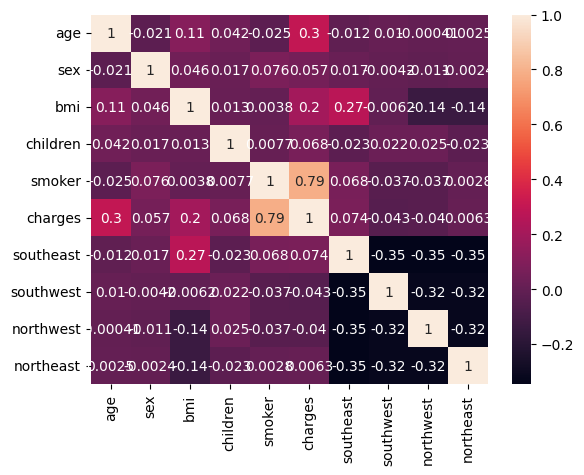

In [ ]:
sns.heatmap(medical_df.corr(),annot=True)

In [ ]:
non_smoker_df = medical_df[medical_df.smoker==0]
non_smoker_df


,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,1,11411.68500
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


In [ ]:
def estimate_charges(age,w,b):
  return age*w + b

In [ ]:
estimate_charges(18,0,-4000)

-4000

In [ ]:
estimated_charges = estimate_charges(non_smoker_df.age,260,-1300)

In [ ]:
estimated_charges

In [ ]:
plt.plot(non_smoker_df.age,estimated_charges)
plt.scatter(non_smoker_df.age,non_smoker_df.charges,alpha=0.8,s=8)
plt.xlabel('Age')
plt.ylabel('Charges')

In [ ]:
rmse = ((non_smoker_df.charges - estimated_charges)**2).mean()**0.5
rmse

4690.983605931086

In [ ]:
import statsmodels.api as sm


X = medical_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = medical_df['charges']

X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:19:00   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.323e+04   1076.023    -12.295      0.0

In [ ]:
!pip install scikit-learn

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(medical_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']],medical_df.charges)

LinearRegression()

In [ ]:
predicticted_charges = model.predict(medical_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']])
predicticted_charges

array([25111.24186363,  3687.60517284,  6963.14570669, ...,
        4363.66236622,  1106.98661296, 37013.72809551])

In [ ]:
rmse = ((medical_df.charges - predicticted_charges)**2).mean()**0.5
rmse

6043.811701706331

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   southeast  1338 non-null   int64  
 7   southwest  1338 non-null   int64  
 8   northwest  1338 non-null   int64  
 9   northeast  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [ ]:
non_smoker_df = medical_df[medical_df.smoker==0]
smoker_df = medical_df[medical_df.smoker==1]

In [ ]:
model_smoker = LinearRegression()
model_non_smoker = LinearRegression()


AttributeError: Module 'sklearn' has no attribute 'train_test_split'

In [ ]:
predicted_smoker_charges = model_smoker.predict(smoker_df[['age', 'sex', 'bmi', 'children', 'region']])
predicted_non_smoker_charges = model_non_smoker.predict(non_smoker_df[['age', 'sex', 'bmi', 'children', 'region']])

In [ ]:
rmse_smoker = ((smoker_df.charges - predicted_smoker_charges)**2).mean()**0.5
rmse_non_smoker = ((non_smoker_df.charges - predicted_non_smoker_charges)**2).mean()**0.5
rmse_smoker,rmse_non_smoker

(5706.974975350807, 4573.22350648627)

In [ ]:
non_smoker_df = medical_df[medical_df.smoker==0]
smoker_df = medical_df[medical_df.smoker==1]

In [ ]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1064 non-null   int64  
 1   sex        1064 non-null   int64  
 2   bmi        1064 non-null   float64
 3   children   1064 non-null   int64  
 4   smoker     1064 non-null   int64  
 5   charges    1064 non-null   float64
 6   southeast  1064 non-null   int64  
 7   southwest  1064 non-null   int64  
 8   northwest  1064 non-null   int64  
 9   northeast  1064 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 91.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(smoker_df[['age', 'sex', 'bmi', 'children', 'southeast','southwest','northwest','northeast']],smoker_df.charges,test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
predicted = model.predict(x_test)

In [ ]:
rmse = rmse = ((y_test - predicted)**2).mean()**0.5
rmse

5249.5621820625565

In [ ]:
model.coef_

array([  273.23490216,  -612.89646229,  1471.06494679,    -3.30030294,
       -1420.37727049,   598.86872927,   308.8587146 ,   512.64982662])

In [ ]:
model.intercept_

-23022.526417181823